# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [32]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [33]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [34]:
str(df_public_data)

'data.frame':	210 obs. of  33 variables:
 $ year                                    : num  2006 2006 2006 2006 2006 ...
 $ month_name                              : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                              : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                                   : Time-Series  from 2006 to 2023: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation            : Time-Series  from 2006 to 2023: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation          : Time-Series  from 2006 to 2023: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ inflation_target                        : Time-Series  from 2006 to 2023: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound            : Time-Series  from 2006 to 2023: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ inflation_target_upper_bound            : Time-Series  from 2006 to 2023: 6

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


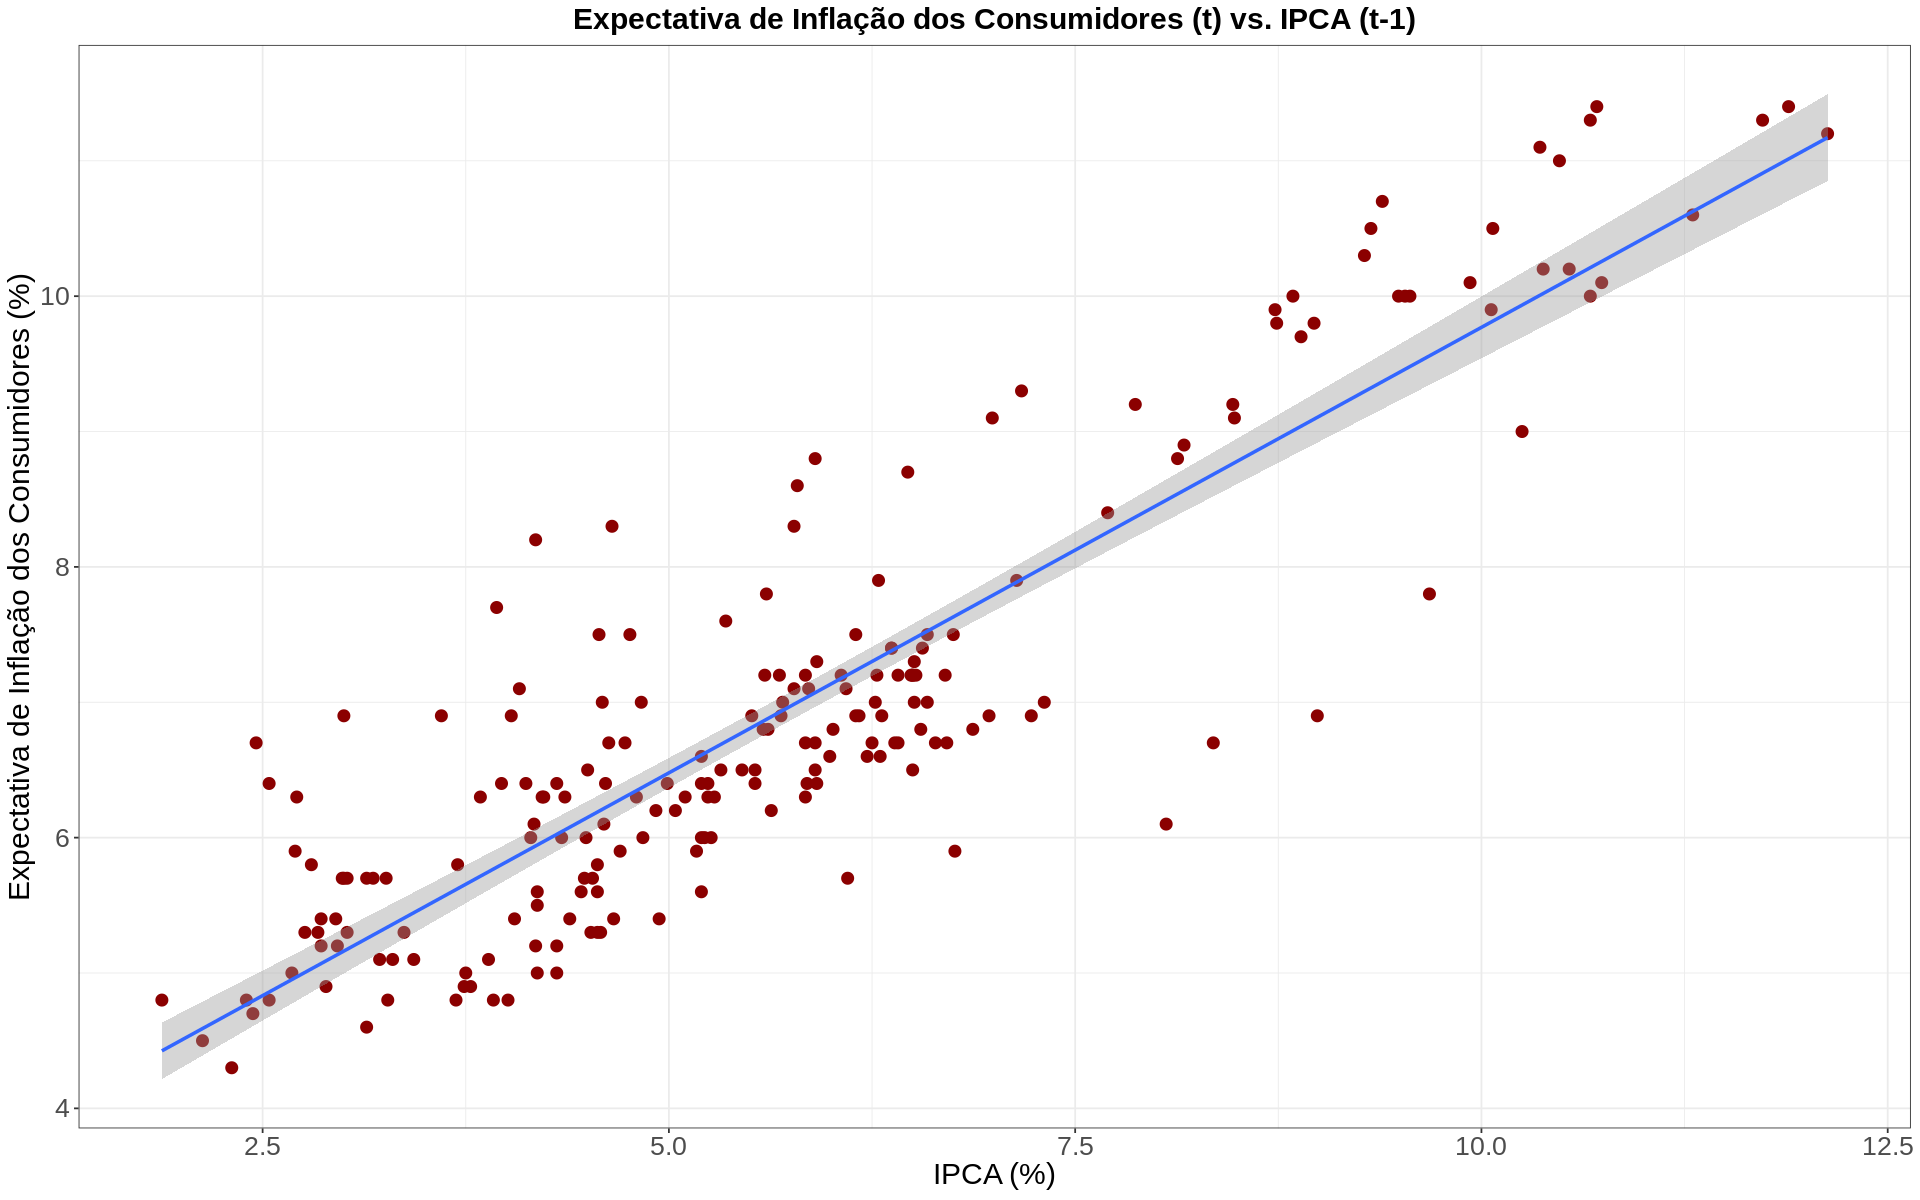

In [35]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = consumer_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação dos Consumidores (%)", title = "Expectativa de Inflação dos Consumidores (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [36]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3694 -0.2961  0.3914  1.3538  3.8899 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  1.14231    0.01569   72.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 209 degrees of freedom
Multiple R-squared:  0.962,	Adjusted R-squared:  0.9619 
F-statistic:  5297 on 1 and 209 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 95% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação dos Consumidores (t) varia 1,142%

> #### **Expectativa de Inflação do Mercado**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


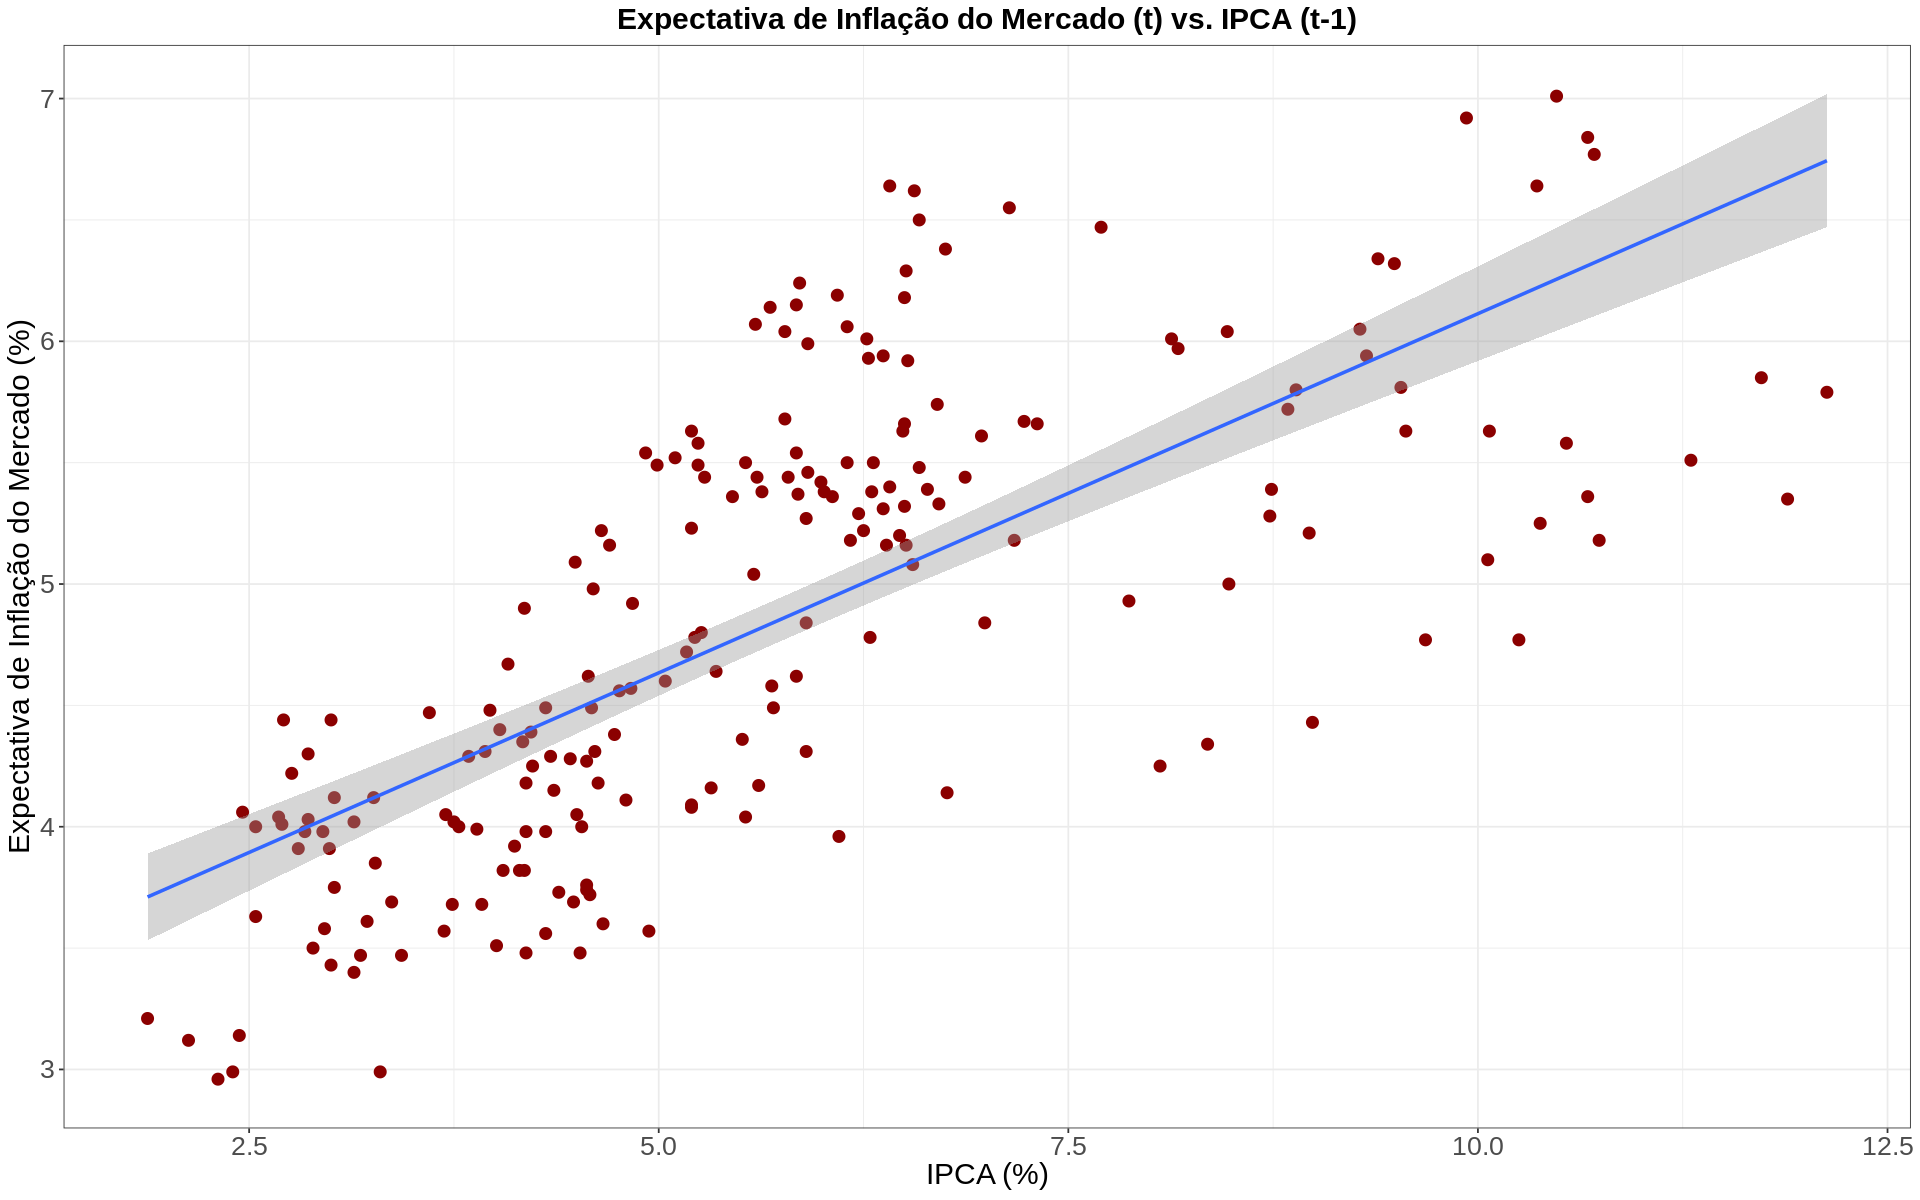

In [37]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "market_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = market_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação do Mercado (%)", title = "Expectativa de Inflação do Mercado (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [38]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8649  0.0681  0.7228  1.2479  2.3397 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  0.77501    0.01492   51.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.326 on 209 degrees of freedom
Multiple R-squared:  0.9281,	Adjusted R-squared:  0.9278 
F-statistic:  2700 on 1 and 209 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 90% da expectativa de inflação do mercado, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação do Mercado (t) varia 0,775%

- ## **What Drives Inflation Expectations in Brazil?**

  - [Reference: Cerisola and Gelos, 2005](https://deliverypdf.ssrn.com/delivery.php?ID=036104118122116086077067024116078091086034032080036086072122014051097004041100029065068117004063079032099107022071108126002028083099076095110105025105074097124114030006099029119113&EXT=pdf&INDEX=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


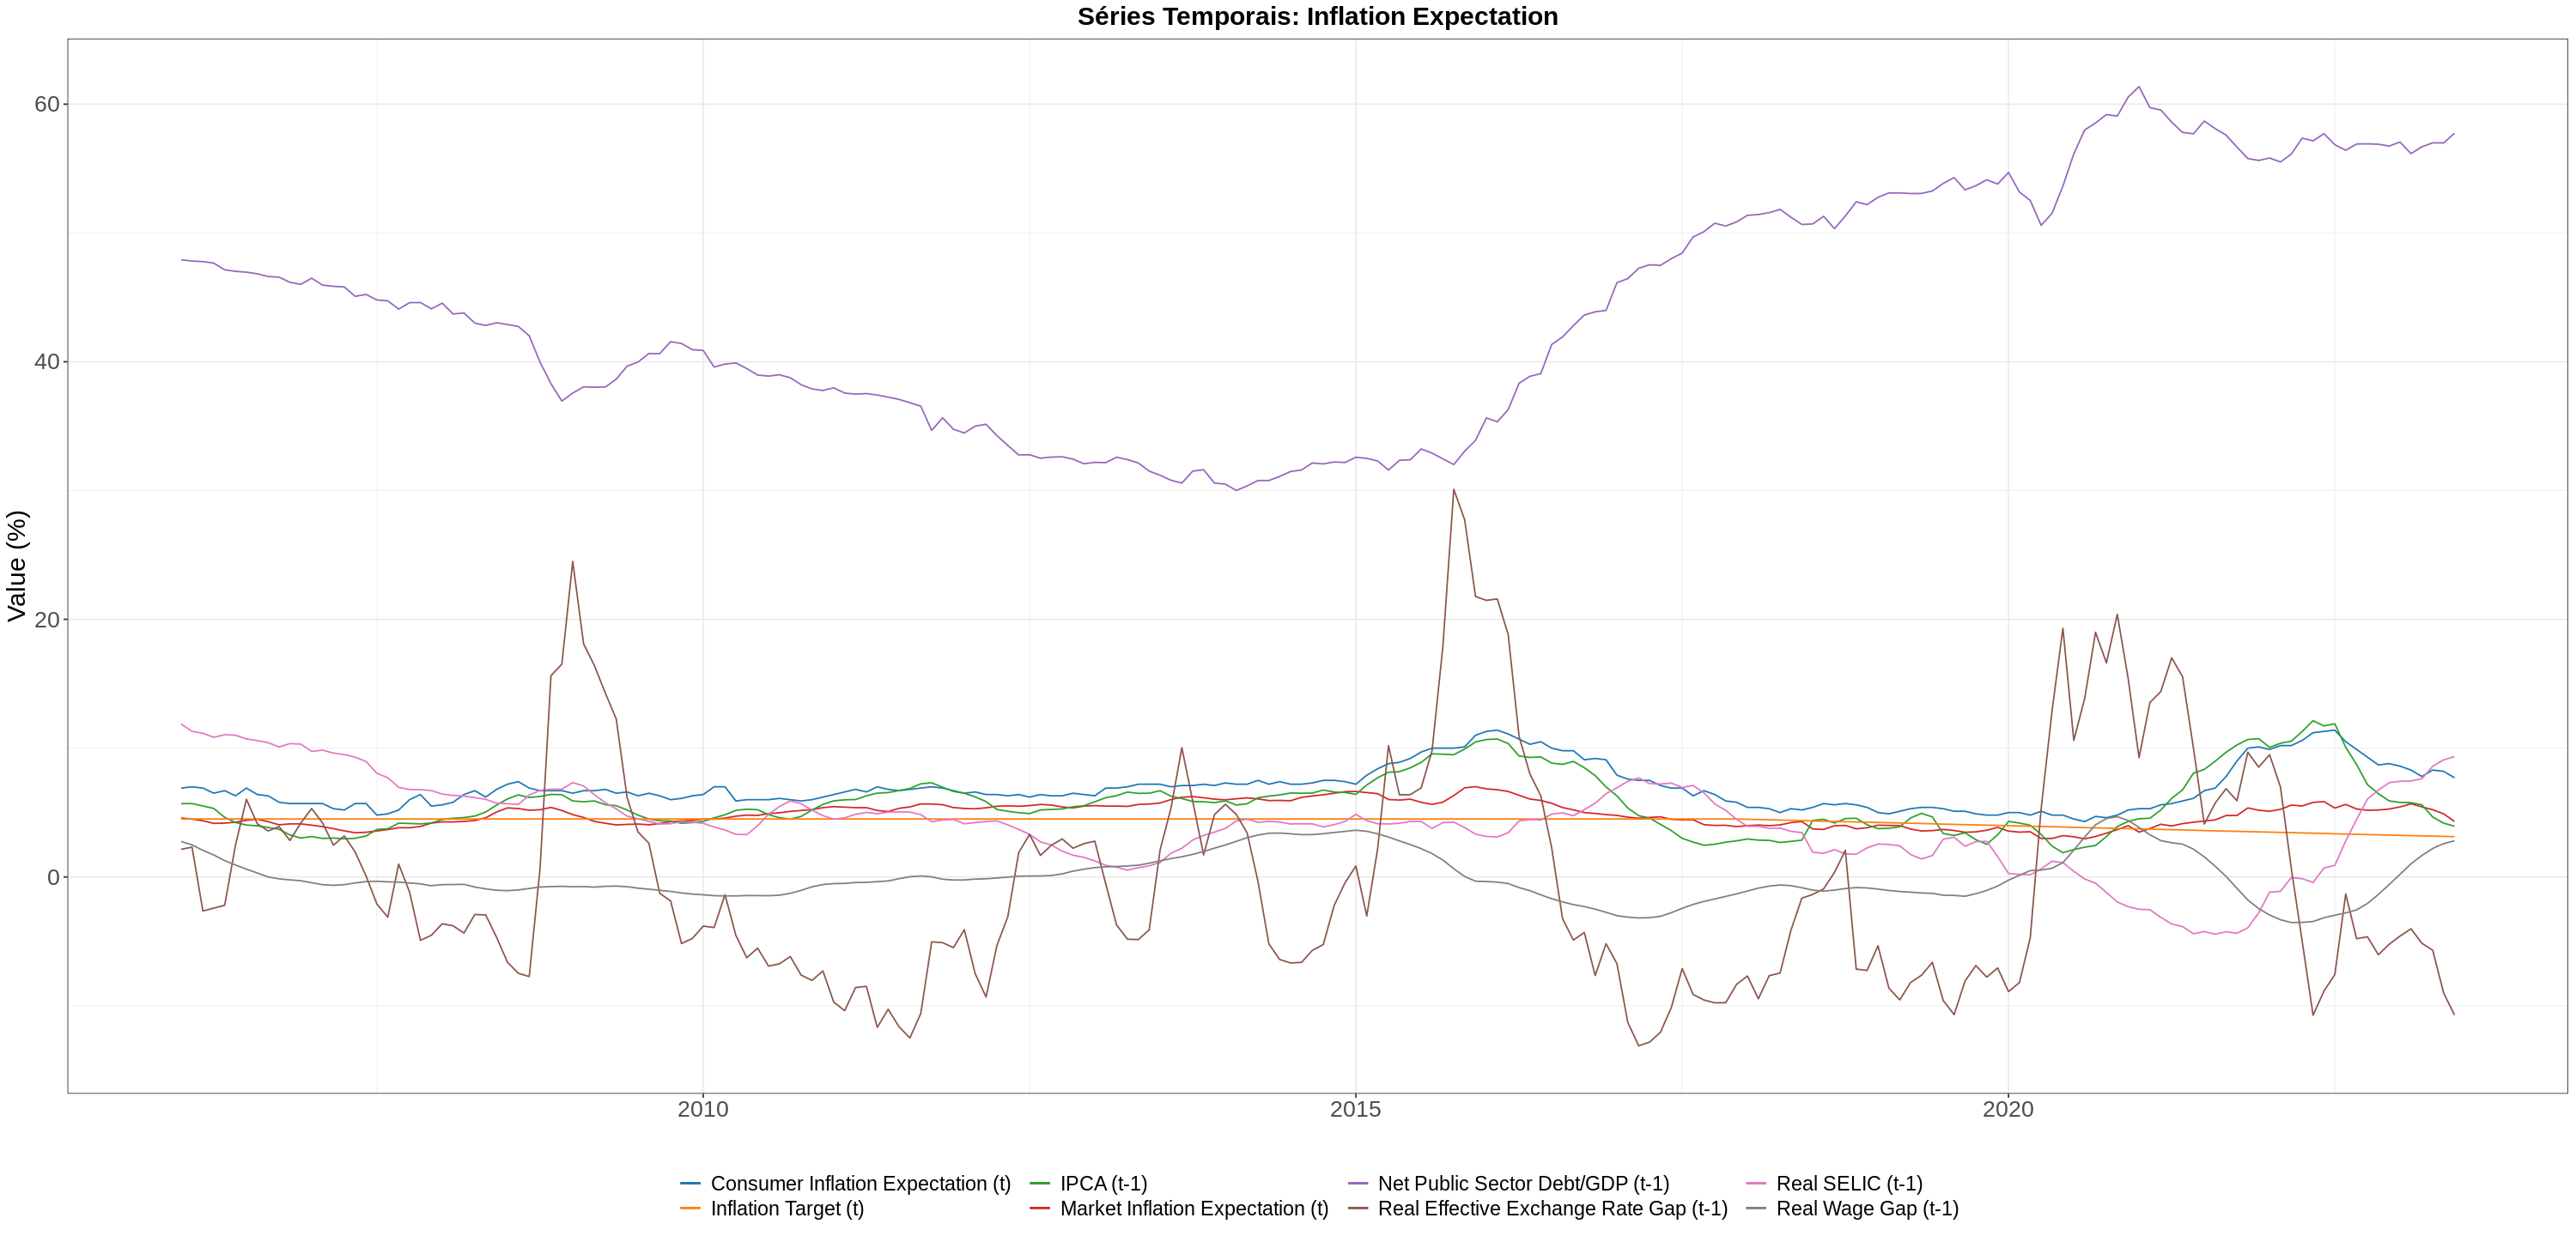

In [39]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 25, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_pct_pib_lag, color = "Net Public Sector Debt/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_trend_diff_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = household_income_deflated_trend_diff_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> #### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&= \alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Net Public Sector Debt/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1,6]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 5%

> **Modelo econométrico**

In [40]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 1,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 1,
    data = df_public_data)

In [41]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56556 -0.44266  0.07307  0.42034  1.64876 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
ipca_lag                                  0.759240   0.020335  37.336  < 2e-16
inflation_target_wtd_avg                  0.175572   0.053277   3.295  0.00116
primary_fiscal_result_pct_pib_lag         0.027638   0.003686   7.499 1.94e-12
selic_deflated_lag                        0.154550   0.015208  10.162  < 2e-16
real_exchange_rate_trend_diff_lag         0.004936   0.005628   0.877  0.38147
household_income_deflated_trend_diff_lag -0.024613   0.026745  -0.920  0.35849
                                            
ipca_lag       

**Resultado**

- A variável `real_exchange_rate_trend_diff_lag` e `household_income_deflated_trend_diff_lag` não são estatisticamente significativas dado o nível de significância β escolhido, enquanto que as outras variáveis são estatisticamente significativas.

In [42]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19709 -0.33788  0.01425  0.28578  1.39281 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
ipca_lag                                  0.372679   0.015234  24.464  < 2e-16
inflation_target_wtd_avg                  0.730264   0.039912  18.297  < 2e-16
primary_fiscal_result_pct_pib_lag        -0.012506   0.002761  -4.529 1.01e-05
selic_deflated_lag                        0.033170   0.011393   2.911    0.004
real_exchange_rate_trend_diff_lag        -0.021030   0.004216  -4.988 1.30e-06
household_income_deflated_trend_diff_lag  0.160365   0.020035   8.004 8.96e-14
                                            
ipca_lag         

In [50]:
tidy( market_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.37267945,0.015233994,24.463673,1.380503e-62
inflation_target_wtd_avg,0.73026400,0.039911501,18.297082,6.709449e-45
primary_fiscal_result_pct_pib_lag,-0.01250597,0.002761134,-4.529286,1.006095e-05
selic_deflated_lag,0.03316984,0.011393164,2.911381,3.998453e-03
real_exchange_rate_trend_diff_lag,-0.02103026,0.004215952,-4.988260,1.301228e-06
household_income_deflated_trend_diff_lag,0.16036525,0.020035277,8.004145,8.963768e-14


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

> **Modelo econométrico apenas com variáveis estatisticamente significativas**

In [47]:
consumer_linear_model_adjusted = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag - 1,
    data = df_public_data)

In [48]:
summary( consumer_linear_model_adjusted )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59450 -0.42665  0.04447  0.42786  1.66670 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.765286   0.019508  39.230  < 2e-16 ***
inflation_target_wtd_avg          0.164127   0.051398   3.193  0.00163 ** 
primary_fiscal_result_pct_pib_lag 0.027970   0.003613   7.742 4.34e-13 ***
selic_deflated_lag                0.154811   0.014725  10.513  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6353 on 206 degrees of freedom
Multiple R-squared:  0.9922,	Adjusted R-squared:  0.9921 
F-statistic:  6586 on 4 and 206 DF,  p-value: < 2.2e-16


In [51]:
tidy( consumer_linear_model_adjusted )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.76528619,0.019507537,39.230283,1.564893e-97
inflation_target_wtd_avg,0.16412678,0.051398387,3.193228,1.627527e-03
primary_fiscal_result_pct_pib_lag,0.02797017,0.003612816,7.741930,4.336570e-13
selic_deflated_lag,0.15481116,0.014725256,10.513308,5.685630e-21


> **Distribuição dos Resíduos**

In [52]:
consumer_residuals <- residuals(consumer_linear_model_adjusted)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [53]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 210 0.01   0.63   -1.59 1.67
--------------------------------------


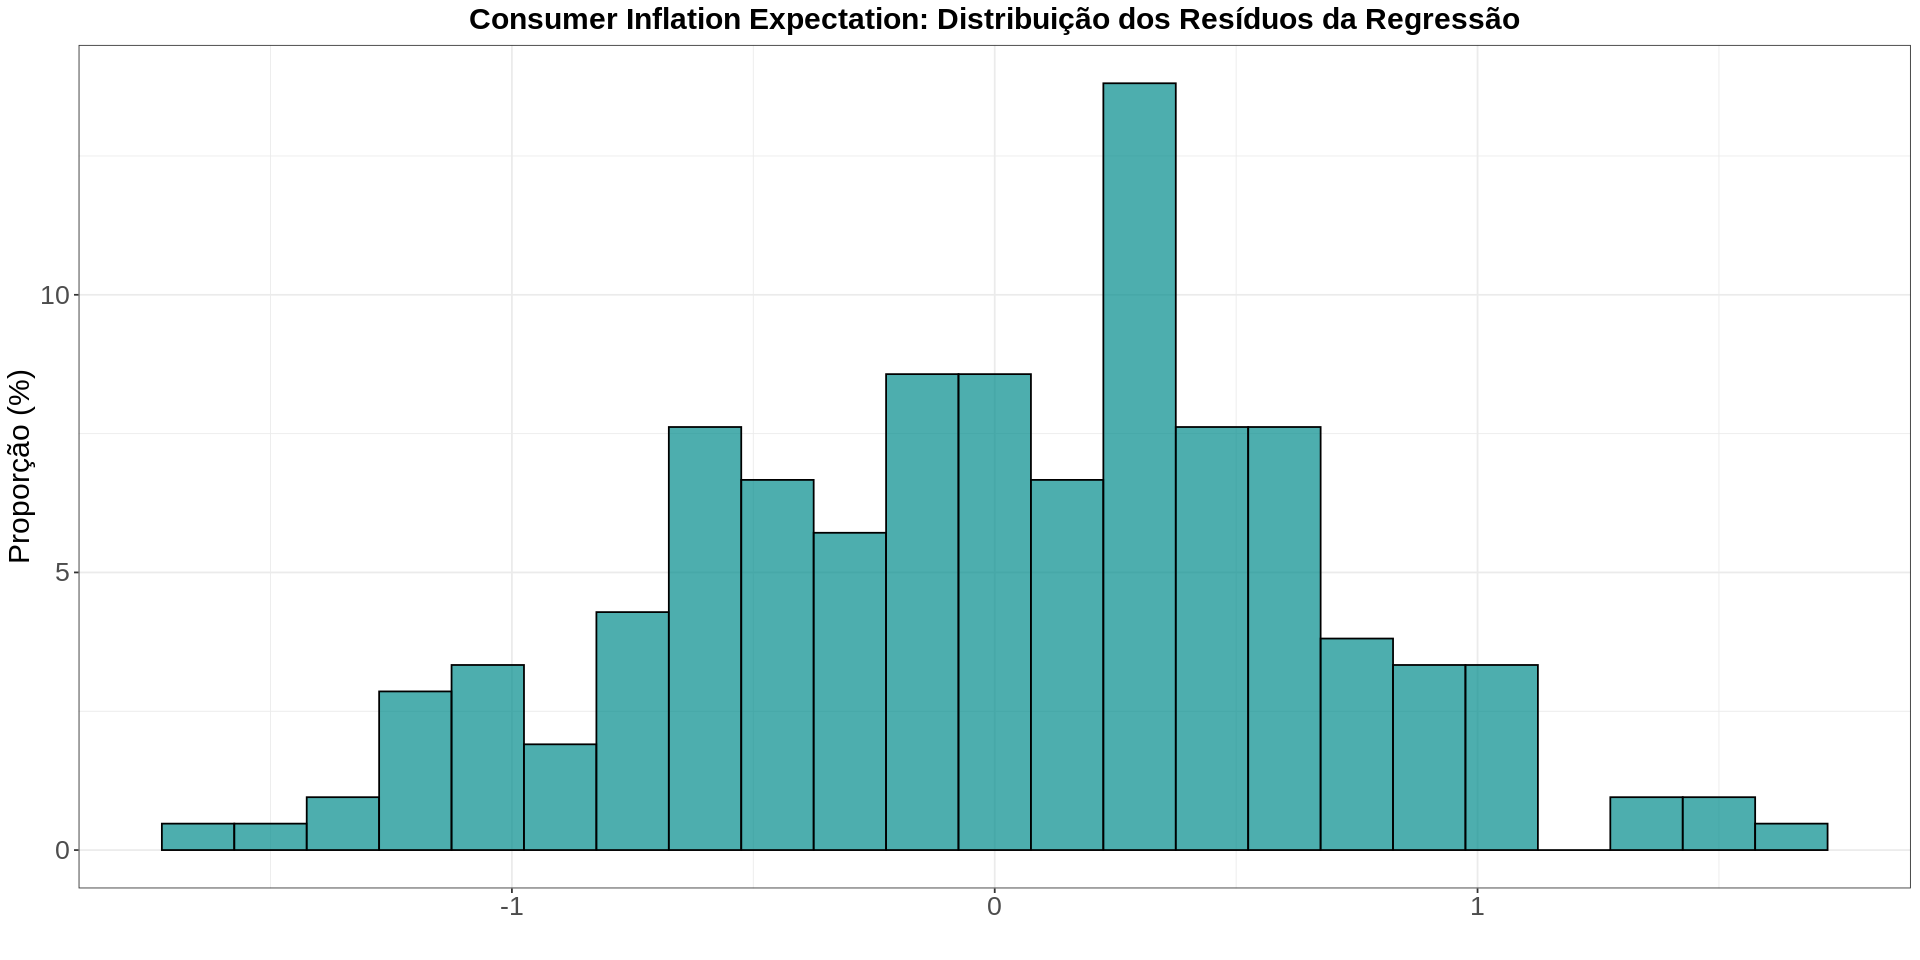

In [54]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [55]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 210 0.01   0.47   -1.20 1.39
--------------------------------------


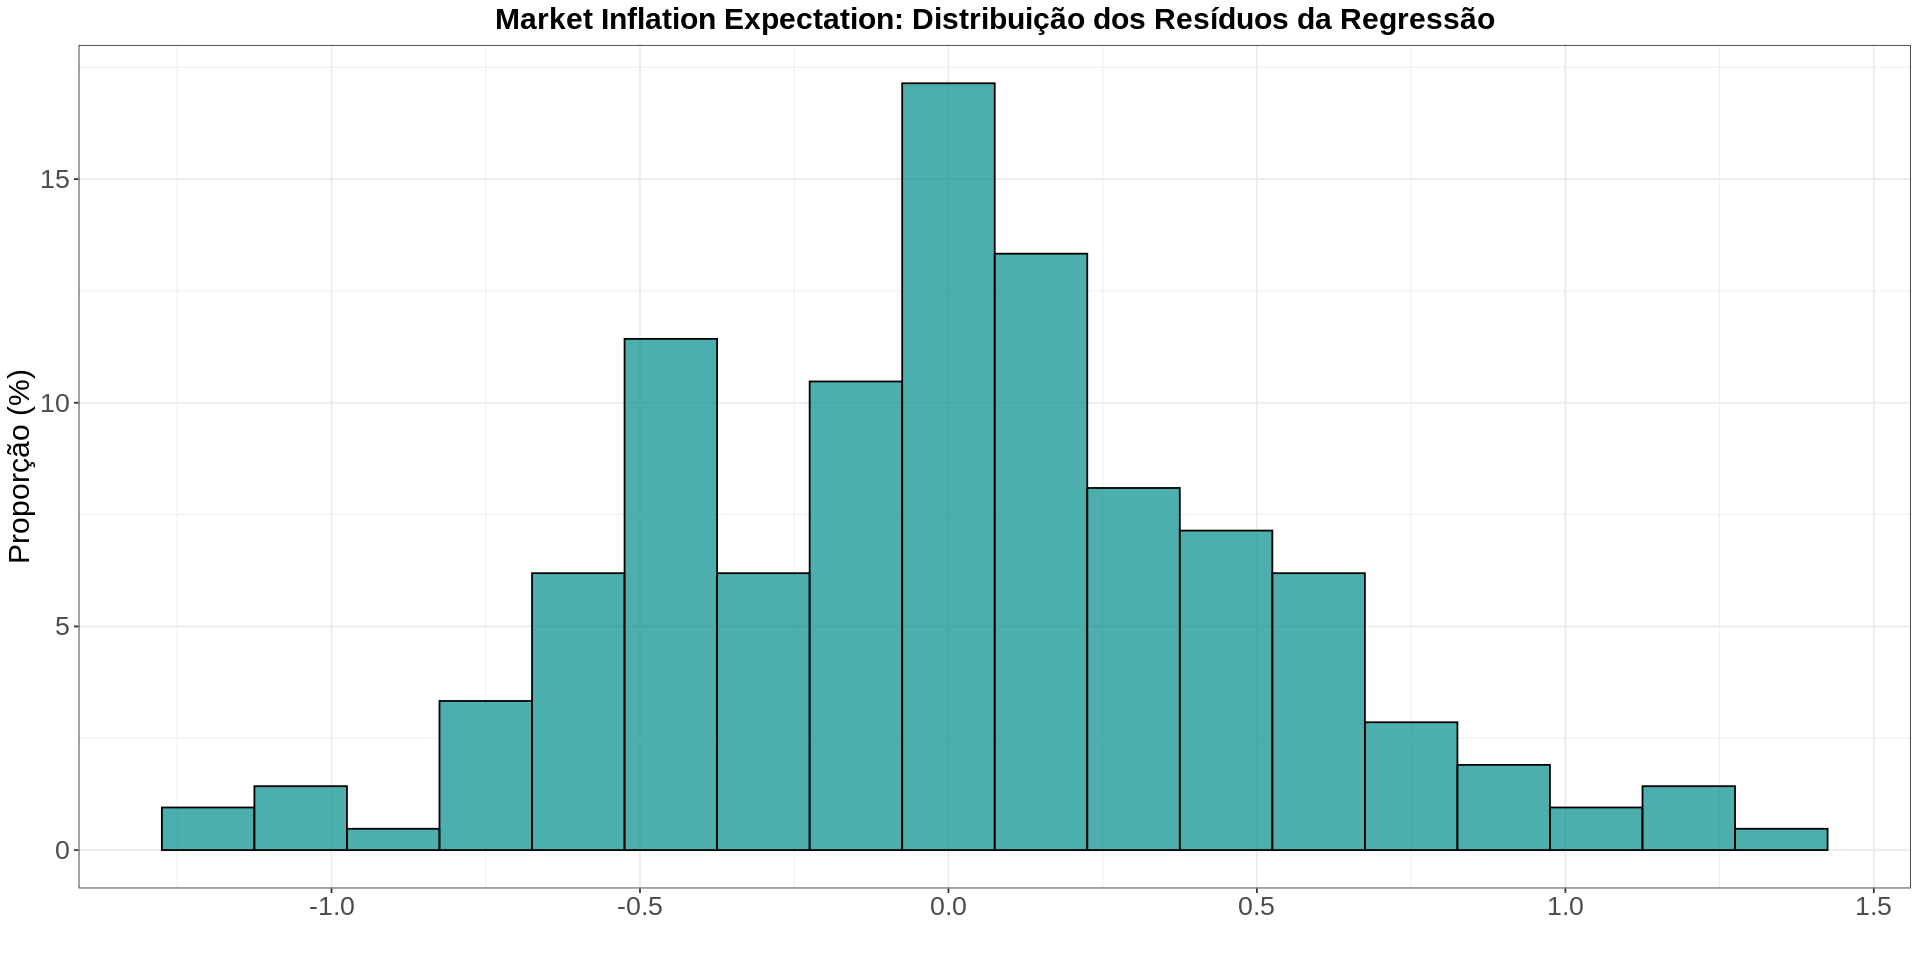

In [56]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> **Estacionariedade dos Resíduos**

- **ADF**

In [57]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1089 -0.1616 -0.0013  0.1654  0.9960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0623411  0.0534426  -1.167  0.24494   
z.lag.1      -0.1742692  0.0576080  -3.025  0.00285 **
tt            0.0006714  0.0004365   1.538  0.12574   
z.diff.lag1   0.0597803  0.0810597   0.737  0.46178   
z.diff.lag2  -0.0162437  0.0806325  -0.201  0.84057   
z.diff.lag3   0.0397320  0.0816744   0.486  0.62722   
z.diff.lag4   0.0051967  0.0814301   0.064  0.94919   
z.diff.lag5   0.0834108  0.0800329   1.042  0.29870   
z.diff.lag6   0.0294847  0.0794369   0.371  0.71094   
z.diff.lag7   0.0331417  0.0774287   0.428  0.66914   
z.diff.lag8  -0.0113572  0.0773604  -0.147  0.88345  

In [58]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98381 -0.10368 -0.00197  0.10855  0.91978 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0221298  0.0375030  -0.590  0.55587   
z.lag.1      -0.1670813  0.0707697  -2.361  0.01929 * 
tt            0.0003050  0.0003032   1.006  0.31579   
z.diff.lag1   0.2050342  0.0901288   2.275  0.02408 * 
z.diff.lag2  -0.0507045  0.0916698  -0.553  0.58086   
z.diff.lag3   0.0525907  0.0875625   0.601  0.54885   
z.diff.lag4  -0.0246272  0.0887296  -0.278  0.78167   
z.diff.lag5  -0.0666353  0.0838415  -0.795  0.42778   
z.diff.lag6  -0.0230791  0.0809735  -0.285  0.77595   
z.diff.lag7  -0.1284850  0.0785770  -1.635  0.10375   
z.diff.lag8  -0.1723461  0.0764441  -2.255 

- **KPSS**

In [59]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2627 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


In [60]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.198 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216
